# Importing dependencies 

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
plt.rcParams.update({'figure.max_open_warning': 0})
from scipy.stats.stats import pearsonr   
%matplotlib inline

# Importing max historical data for SPY

In [3]:
start = datetime(1990, 1, 1)
end = pd.datetime.now()
data = web.DataReader("SPY",'yahoo', start=start, end=end)[['Adj Close']]
data.head()

,Adj Close
Date,
1993-01-29,26.954851
1993-02-01,27.146563
1993-02-02,27.204052
1993-02-03,27.491642
1993-02-04,27.606684


In [5]:
# dimensionality of the DataFrame by (rows,columns)
data.shape

(6535, 1)

#  Writing a function to look for a cross-correlation between the last N (user input) trading days and  the historical data  

In [6]:
def corr_window (data, cdw, dyf, corr_level):
    
    '''
    data = historical data
    cdw = corralation days window
    dyf = number of days forward
    corr_level = desirable correlation level
    '''
    mylabels = ['Spy', str(dyf)+' days forward']
    s=[]
    data2= data[-cdw:]
    data[-cdw:].plot(title='SPY last {} trading Days'.format(str(cdw)))
    for i in range(len(data)-cdw*2):
        if (pearsonr(data[i:i+cdw],data2)[0]) > corr_level:
            s.append((data.iloc[i+cdw+dyf]['Adj Close']/data.iloc[i+cdw]['Adj Close'])-1)
            fig, ax = plt.subplots(1, 1)
            data[i:i+cdw+dyf].plot(title="Correlation:"+str(pearsonr(data[i:i+cdw],data2)[0]),ax=ax)
            data[i+cdw:i+cdw+dyf].plot(color = 'red',label='Days forward', ax=ax)
            ax.legend(labels=mylabels, loc=0)
            plt.tight_layout();
    return print(f'Average Return after {dyf} days is {round(np.mean(s)*100,2)}% \nfor {len(s)} occurrences\
    ----> {np.round(sum(1 for x in s if x>0)/len(s)*100,1)}% positive returns\n')

            


Average Return after 4 days is 0.29% 
for 9 occurrences    ----> 66.7% positive returns



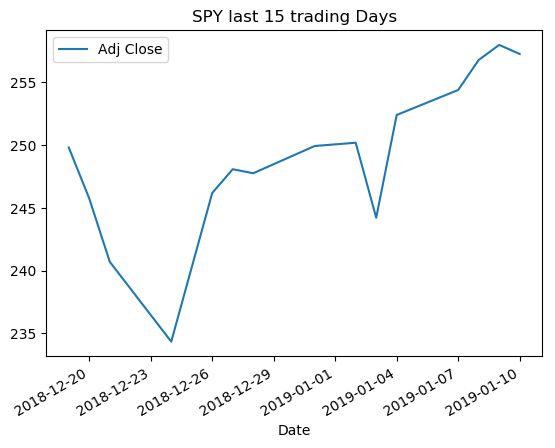

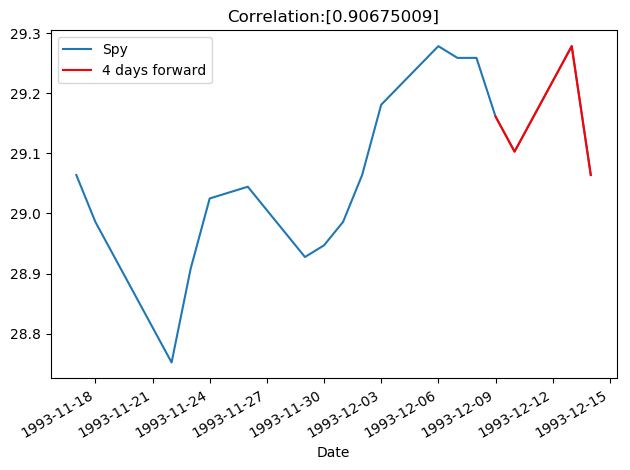

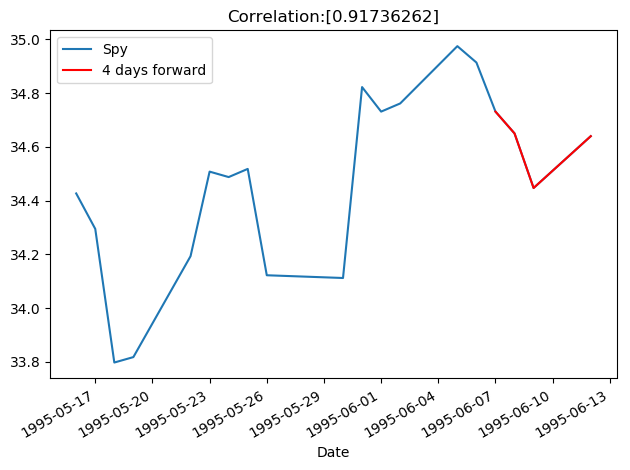

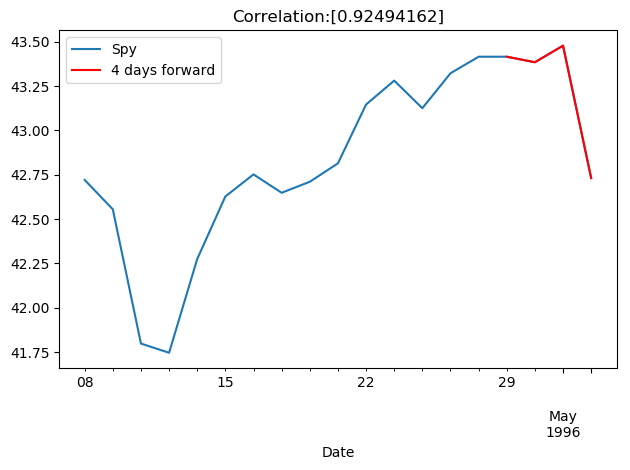

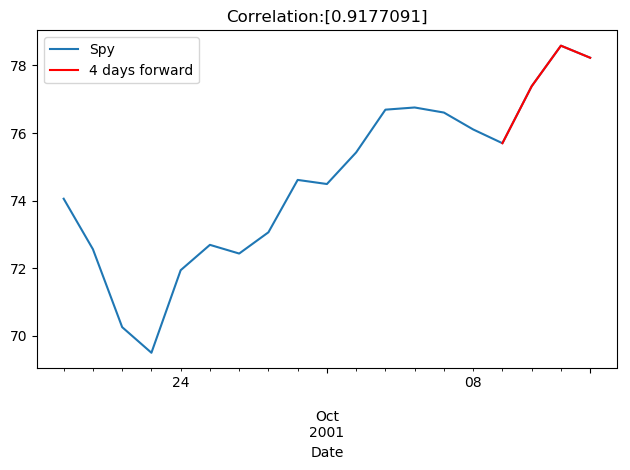

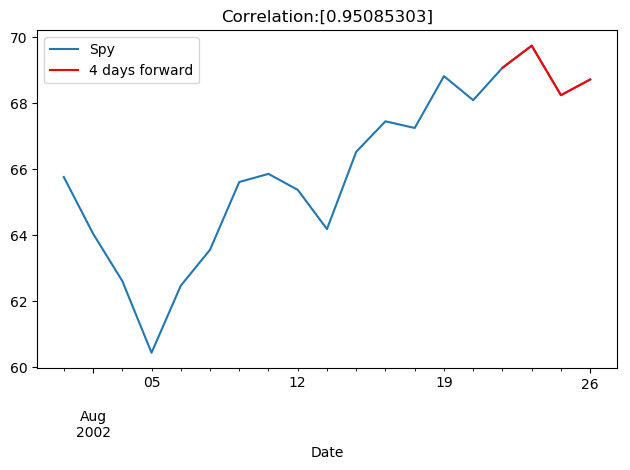

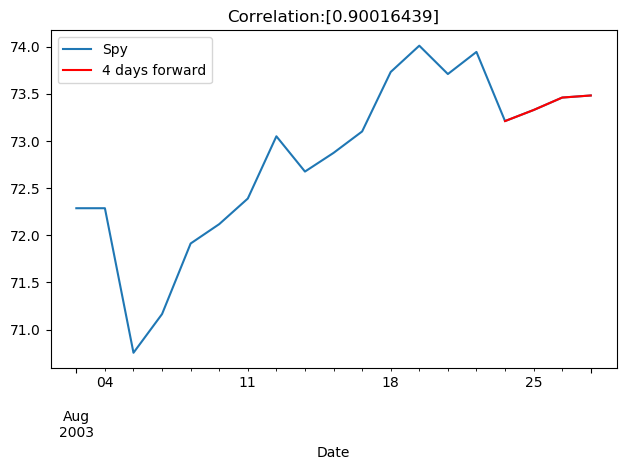

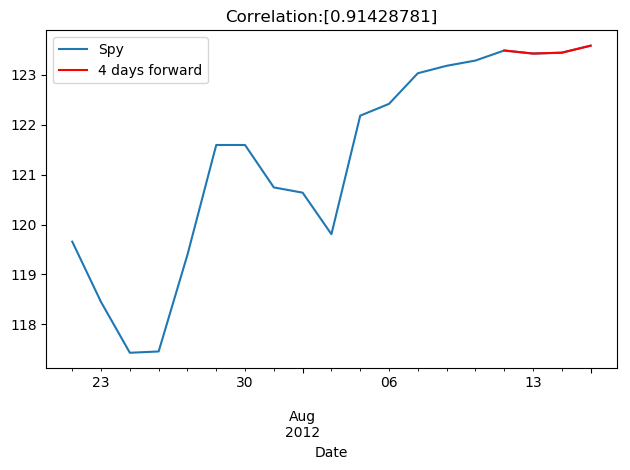

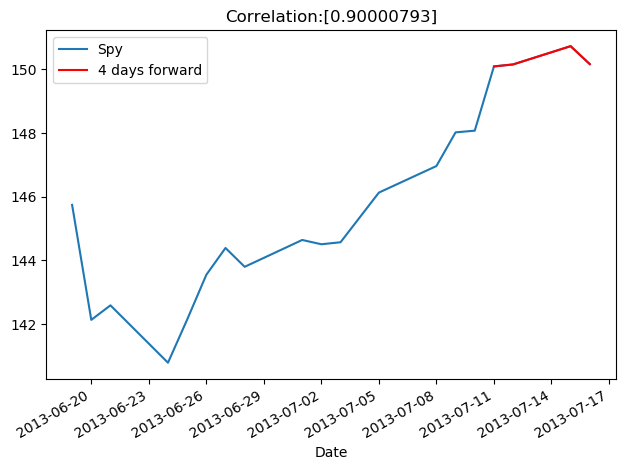

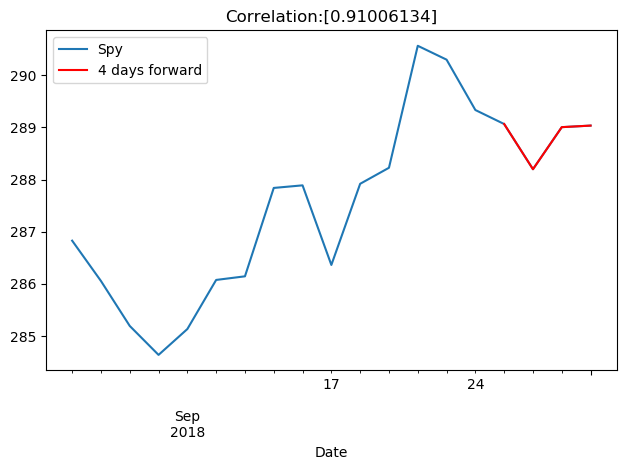

In [21]:
corr_window(data, 15, 4, 0.90)